# Introduction

loading...





Link list for aerticles about trolls:

https://www.linkedin.com/pulse/why-internet-comments-so-toxic-kiera-tsenti/
> If you want to feel shit about the state of the world and everyone in it, Facebook comments are a great place to start.
> I recently saw a mob on LinkedIn make fun of someone for using the word 'nuance'. This was fascinating, because it suggested that the concept of thinking in shades of grey has become so unfamiliar, we've started to reject the language associated with it.

https://www.civilized.life/articles/states-ranked-by-toxic-internet-comments/

https://www.theguardian.com/science/brain-flapping/2014/sep/12/comment-sections-toxic-moderation
> It sits there like an ugly growth beneath articles, bloated and throbbing with vitriol. It groans as hatred expands its force, waiting for any point of dissent to break it – to unleash its full fury on targets who dare convey some measure of civility or dissent (if you want almost guaranteed hate, be a woman).

https://www.nytimes.com/2018/08/08/technology/personaltech/internet-trolls-comments.html
> Ms. Papacharissi said that in her 20 years of researching and interviewing people about online behavior, one conclusion has remained consistent: people use the internet to get more of what they do not get enough of in everyday life.So while people have been socialized to resist being impulsive in the real world, on the internet they cave to their temptations to lash out.

>It’s up to the content providers and tech platforms to vet their communities and set rules and standards for civilized discussion.

> That is an area where many resource-strained news publications fall short: They often leave their comments sections unmoderated, so they become cesspools of toxic behavior. It is also an area where tech companies like Facebook and Twitter struggle, because they have long portrayed themselves as neutral platforms that do not that do not wish to take on the editorial roles of traditional publishers.

https://www.wired.com/2017/08/internet-troll-map/
> INTERNET RULE #1: Never read the comments.

# What kind of data are we dealing with?

The primary data for the competition is, in each provided file, the comment_text column. 
This contains the text of a comment which has been classified as toxic or non-toxic (0...1 in the toxic column). 
The train set’s comments are entirely in english and come either from Civil Comments or Wikipedia talk page edits. 
The test data's comment_text columns are composed of multiple non-English languages.

The *-train.csv files* and validation.csv file also contain a toxic column that is the target to be trained on.

The jigsaw-toxic-comment-train.csv and jigsaw-unintended-bias-train.csv contain training data (comment_text and toxic) from the two previous Jigsaw competitions, as well as additional columns that you may find useful.

*-seqlen128.csv files* contain training, validation, and test data that has been processed for input into BERT.

**What is BERT?**

**Bidirectional Encoder Representations from Transformers (BERT)** is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

The original English-language BERT model used two corpora in pre-training: BookCorpus and English Wikipedia.

# Meta Data

| Variable | Definition                                 | Key                                            | Type        |
|:----------|:--------------------------------------------|:------------------------------------------------|-------------|
|comment_text|
|toxic|
|severe_toxicity|
|obscene|
|identity_attack|
|insult|
|threat|
|asian|
|atheist|
|bisexual|
|black|
|buddhist|
|christian|
|female|
|heterosexual|
|hindu|
|homosexual_gay_or_lesbian|
|intellectual_or_learning_disability|
|jewish| 
|latino| 
|male|
|muslim|
|other_disability|
|other_gender|
|other_race_or_ethnicity|
|other_religion|
|other_sexual_orientation|
|physical_disability|
|psychiatric_or_mental_illness|
|transgender| 
|white|
|created_date|
|rating| 
|funny| 
|wow| 
|sad|
|likes|
|disagree|
|sexual_explicit|
|identity_annotator_count|
|toxicity_annotator_count|

# Exploratory Data Analysis

Exploratory data analysis is a critical phase in the data science process. We will take a thorough look through the data to discover patterns in the data, form hypotheses, and gather insights. Additionally, I am going to display key information in a visually appealing graphs for better understanding. 

In [2]:
#workflow and statistics
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt

#for showing missing values
import missingno as msno

#visualisation
import seaborn as sns

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#natural language processing toolkit
import nltk
import string
from nltk.corpus import stopwords  # removes useless words
from nltk.stem.lancaster import LancasterStemmer  #converts the words to base form; aggressive
from nltk.stem import porter
from nltk.stem.util import suffix_replace, prefix_replace
from nltk.stem.api import StemmerI
from nltk.stem import SnowballStemmer

#create a wordcloud of often used words
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
nltk.download('stopwords')


#accessing google cloud storage
from google.cloud import storage
from io import BytesIO
client = storage.Client()
bucket = "bilderkennung_nf_2020"

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/drenizerama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Data

Import the dataset and get a first overview: 

In [3]:
train_data = pd.read_csv("gs://bilderkennung_nf_2020/data /jigsaw-toxic-comment-train.csv")

In [4]:
train_data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [5]:
valid_data = pd.read_csv("gs://bilderkennung_nf_2020/data /validation.csv")

In [6]:
valid_data.head(2)

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0


In [7]:
test_data = pd.read_csv("gs://bilderkennung_nf_2020/data /test.csv")

In [8]:
test_data.head(2)

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru


Import extended dataset for analysis purposes:

In [9]:
data = pd.read_csv("gs://bilderkennung_nf_2020/data /jigsaw-unintended-bias-train.csv")

In [10]:
np.transpose(data.describe())

,count,mean,std,min,25%,50%,75%,max
id,1902194.0,3.912771e+06,2.497349e+06,59848.0,827354.25,5282205.0,5.862735e+06,7194639.00
toxic,1902194.0,1.030068e-01,1.970813e-01,0.0,0.00,0.0,1.666667e-01,1.00
severe_toxicity,1902194.0,4.585531e-03,2.286902e-02,0.0,0.00,0.0,0.000000e+00,1.00
obscene,1902194.0,1.388516e-02,6.465998e-02,0.0,0.00,0.0,0.000000e+00,1.00
identity_attack,1902194.0,2.259572e-02,7.863447e-02,0.0,0.00,0.0,0.000000e+00,1.00
insult,1902194.0,8.117227e-02,1.760987e-01,0.0,0.00,0.0,9.090909e-02,1.00
threat,1902194.0,9.298498e-03,4.939469e-02,0.0,0.00,0.0,0.000000e+00,1.00
asian,426707.0,1.190451e-02,8.691443e-02,0.0,0.00,0.0,0.000000e+00,1.00
atheist,426707.0,3.362494e-03,5.164787e-02,0.0,0.00,0.0,0.000000e+00,1.00
bisexual,426707.0,1.896608e-03,2.625896e-02,0.0,0.00,0.0,0.000000e+00,1.00


In [11]:
data = data.drop('id', axis=1)

In [12]:
data = data.drop('publication_id', axis=1)

In [13]:
data = data.drop('parent_id', axis=1)

In [14]:
data.columns

Index(['comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'sexual_explicit', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [15]:
data.shape

(1902194, 42)

The dataset has 1902194 data points and 42 features.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902194 entries, 0 to 1902193
Data columns (total 42 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   comment_text                         object 
 1   toxic                                float64
 2   severe_toxicity                      float64
 3   obscene                              float64
 4   identity_attack                      float64
 5   insult                               float64
 6   threat                               float64
 7   asian                                float64
 8   atheist                              float64
 9   bisexual                             float64
 10  black                                float64
 11  buddhist                             float64
 12  christian                            float64
 13  female                               float64
 14  heterosexual                         float64
 15  hindu                           

comment_text, created_date, rating are not numerical.

## Preprocessing

**Text Cleaning**

In [23]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
train_data['comment_text'] = train_data['commen_text'].apply(remove_punctuation)
test_data['content'] = test_data['content'].apply(remove_punctuation)

In [24]:
sw=stopwords.words('english')
def removesw(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
train_data['comment_text'] = train_data['comment_text'].apply(removesw)
test_data['content'] = test_data['content'].apply(removesw)

In [43]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
train_data['comment_text'] = train_data['comment_text'].apply(stemming)
test_data['content'] = test_data['content'].apply(stemming)

## Check for Missings

Check for missing values in the data:

In [23]:
data.isnull().sum()

comment_text                                 0
toxic                                        0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1475487
atheist                                1475487
bisexual                               1475487
black                                  1475487
buddhist                               1475487
christian                              1475487
female                                 1475487
heterosexual                           1475487
hindu                                  1475487
homosexual_gay_or_lesbian              1475487
intellectual_or_learning_disability    1475487
jewish                                 1475487
latino                                 1475487
male                                   1475487
muslim       

Visualize missing data:

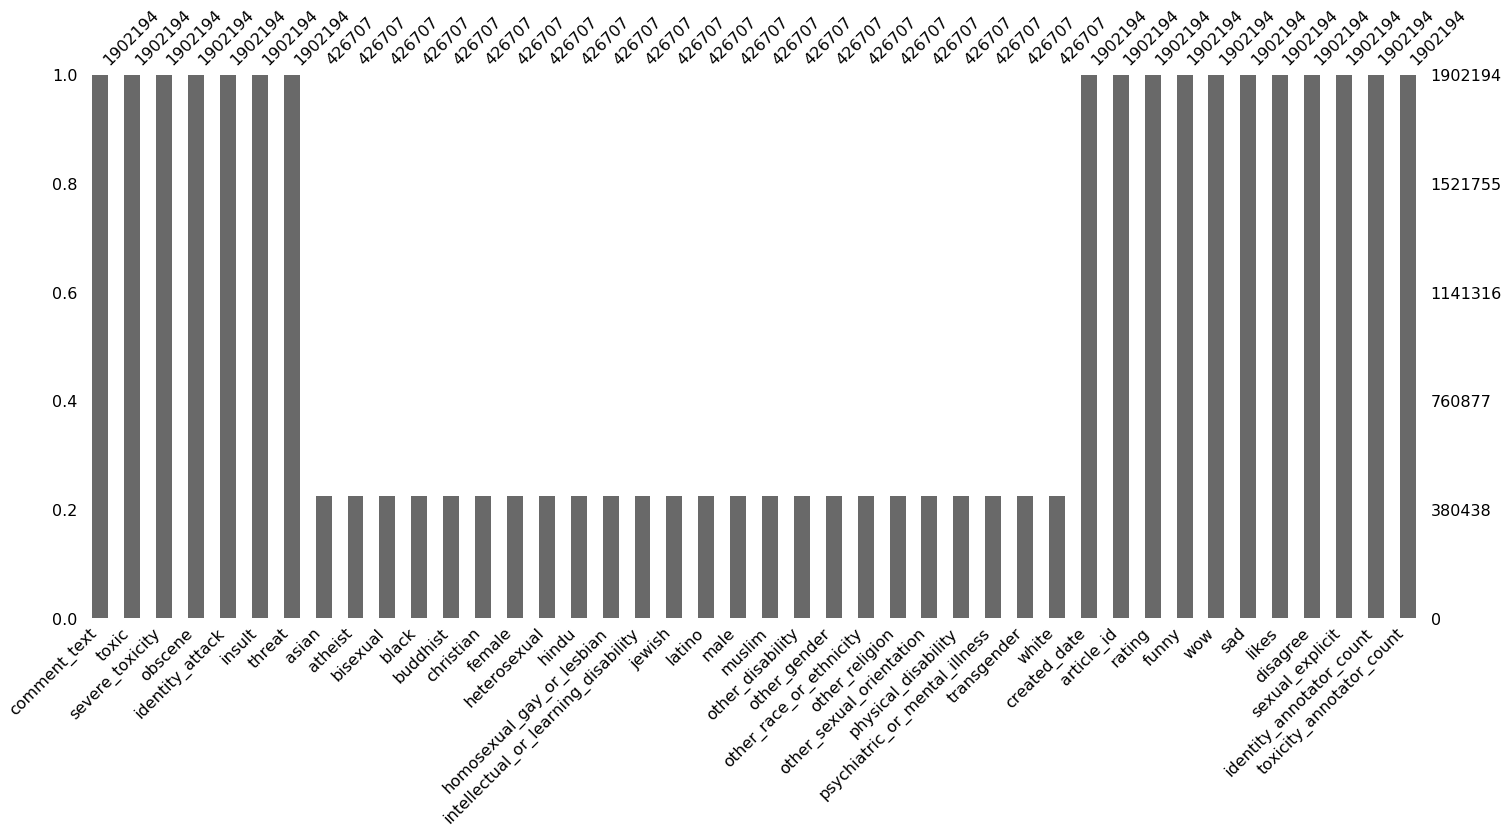

In [25]:
msno.bar(data);

What do we see in the bar chart above?

   + There is an equal amount of missing values in all of the identitiy features.

This may indicate that the type of identity hate has been evaluated only later on. However, it is more likely that two datasets have been joined. 

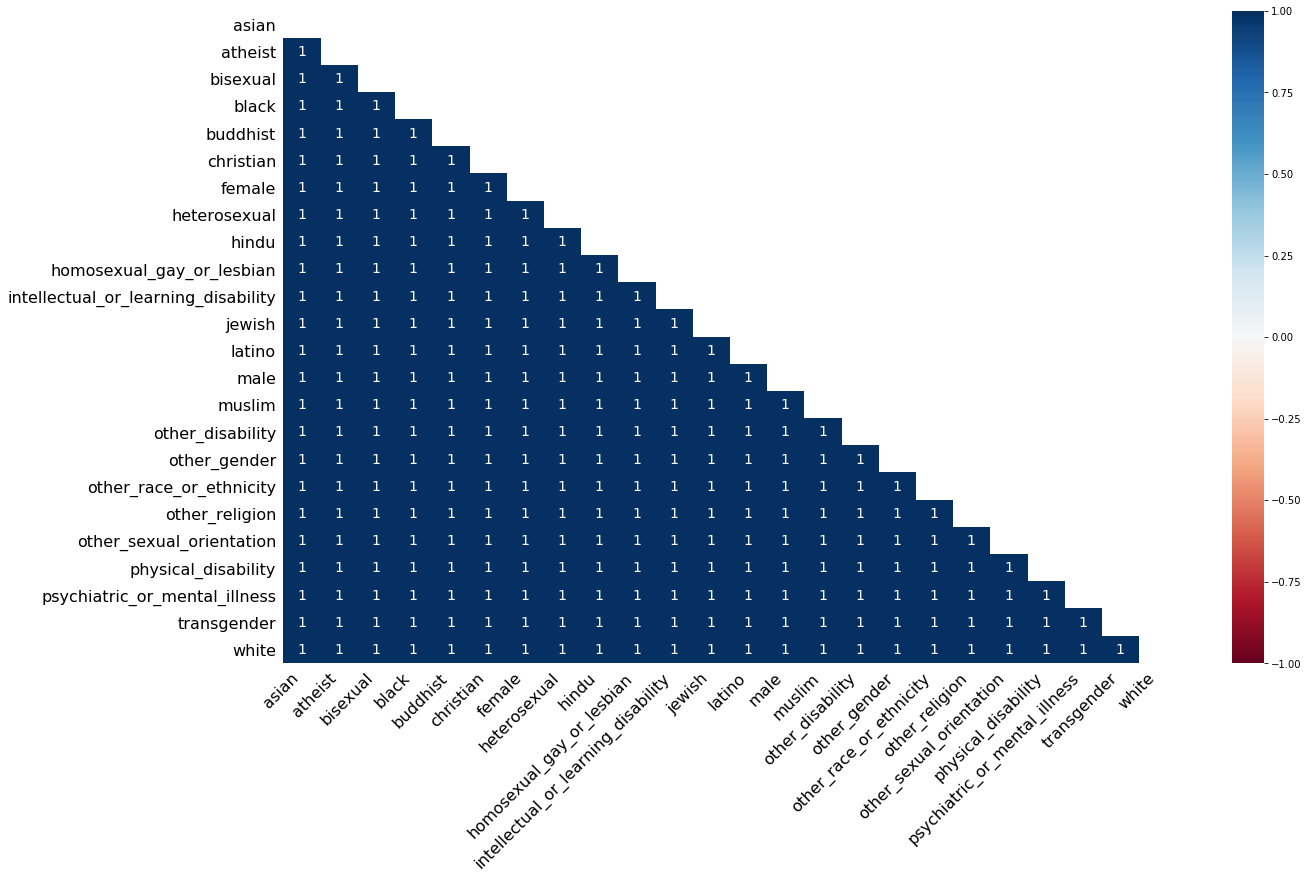

In [27]:
msno.heatmap(data);

The perfect value of 1 in the *missing values heatmap* confirms that if one identity feature is present the other identity features are also present, suggesting that they have been added at the same time. This is a systematic error, so just going with the 'complete cases analysis' and reducing the sample to complete cases won't do. This ignorance might reduce analysis precision significantly. And that's surely not what we want.

*Multiple Imputation Method*

To deal with the missing data I am suggesting the method of *multiple imputation*.
The method of the imputation should be "*to inject the correct degree of randomness into the imputations and to incorporate that uncertainty when computing standard errors and confidence intervals for parameters of interest.*“ (Royston 2004: 228)

## Visual Exploration

**Data Visualization**

As shown below, we have highly imbalanced data:

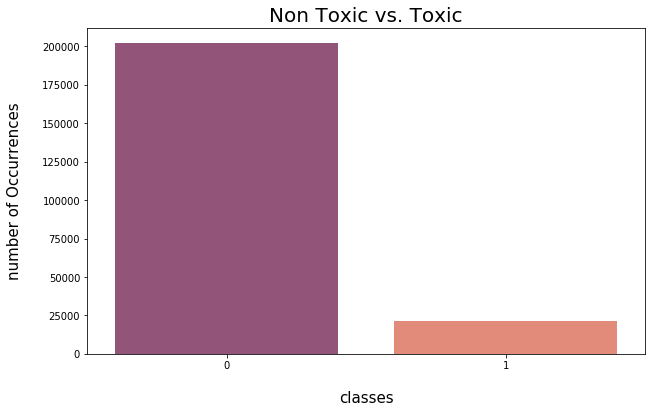

In [28]:
plt.figure(1,figsize=(10,6))
sns.countplot(train_data.toxic,alpha=0.8,palette='rocket')
plt.title("Non Toxic vs. Toxic",fontsize=20)
plt.ylabel('number of Occurrences', fontsize=15,labelpad=20)
plt.xlabel('classes', fontsize=15,labelpad=20)
plt.show()

In [17]:
train_data['text length'] = train_data['comment_text'].apply(len)

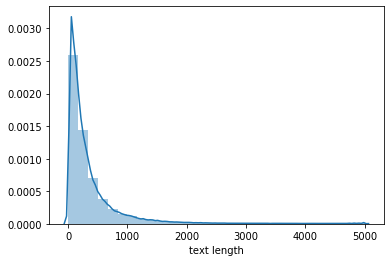

In [20]:
sns.distplot(a=train_data['text length'],bins=30);

Machine algorithms are designed to maximize accuracy and reduce error. This is best achieved when data class sizes are equal. With imbalanced data the accuracy of a model is very likely to be high and therefore misleading. 

There are different ways to deal with imbalanced data:

1. Change the performance metric:
    + take a look at confusion matrix, precision, recall and f1 score 
2. Change the algorithm
3. Resampling Techniques — Oversample minority class
4. Resampling techniques — Undersample majority class
5. Generate synthetic samples

I am going for option 1. 

Change language abbreviations to full language name in test dataset.

In [29]:
test_data.lang.replace('es','Spanish',inplace=True)
test_data.lang.replace('it','Italian',inplace=True)
test_data.lang.replace('tr','Turkish',inplace=True)
test_data.lang.replace('ru','Russian',inplace=True)
test_data.lang.replace('fr','French',inplace=True)
test_data.lang.replace('pt','Portuguese',inplace=True)

Show how many comments are written in all the languages:

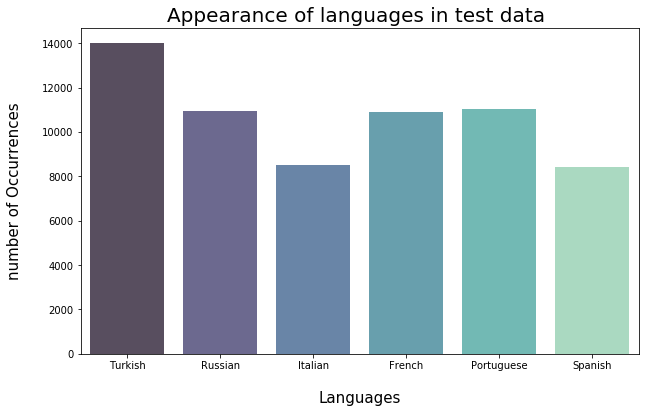

In [30]:
plt.figure(1,figsize=(10,6))
sns.countplot(test_data.lang,alpha=0.8,palette='mako')
plt.title("Appearance of languages in test data ",fontsize=20)
plt.ylabel('number of Occurrences', fontsize=15,labelpad=20)
plt.xlabel('Languages', fontsize=15,labelpad=20)
plt.show()

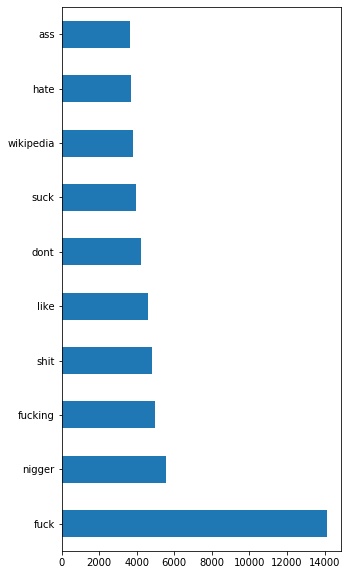

In [32]:
train_data['length'] = train_data['comment_text'].apply(len)
toxic_data = train_data[train_data['toxic'] == 1]
sevtoxic_data = train_data[train_data['severe_toxic'] == 1]
nontoxic=train_data[train_data.iloc[:,2:7].sum(axis=1)==0]

count=pd.Series(' '.join(toxic_data['comment_text']).split()).value_counts()
count=count.sort_values(ascending=False)
count_head=count.head(10)
count_head.plot(kind = 'barh', figsize=(5,10))

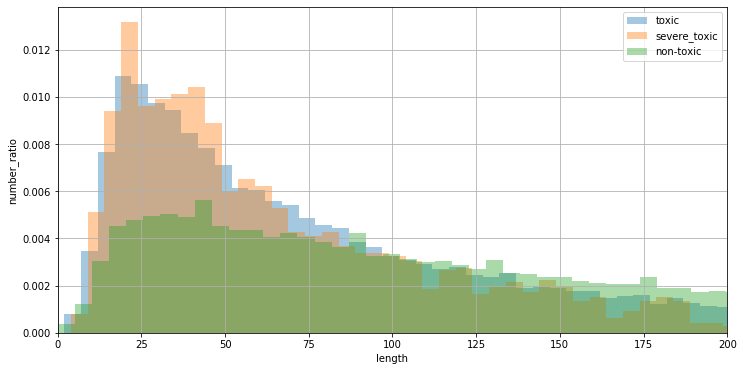

In [36]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 1000
plt.hist(toxic_data['length'], alpha = 0.4, bins=bins, label='toxic',density=True)
plt.hist(sevtoxic_data['length'], alpha = 0.4, bins=bins, label='severe_toxic',density=True)
plt.hist(nontoxic['length'], alpha = 0.4, bins=bins, label='non-toxic',density=True)
plt.xlabel('length')
plt.ylabel('number_ratio')
plt.legend(loc='upper right')
plt.xlim(0,200)
plt.grid()
plt.show()

In [ ]:
#sns.pairplot(data1);

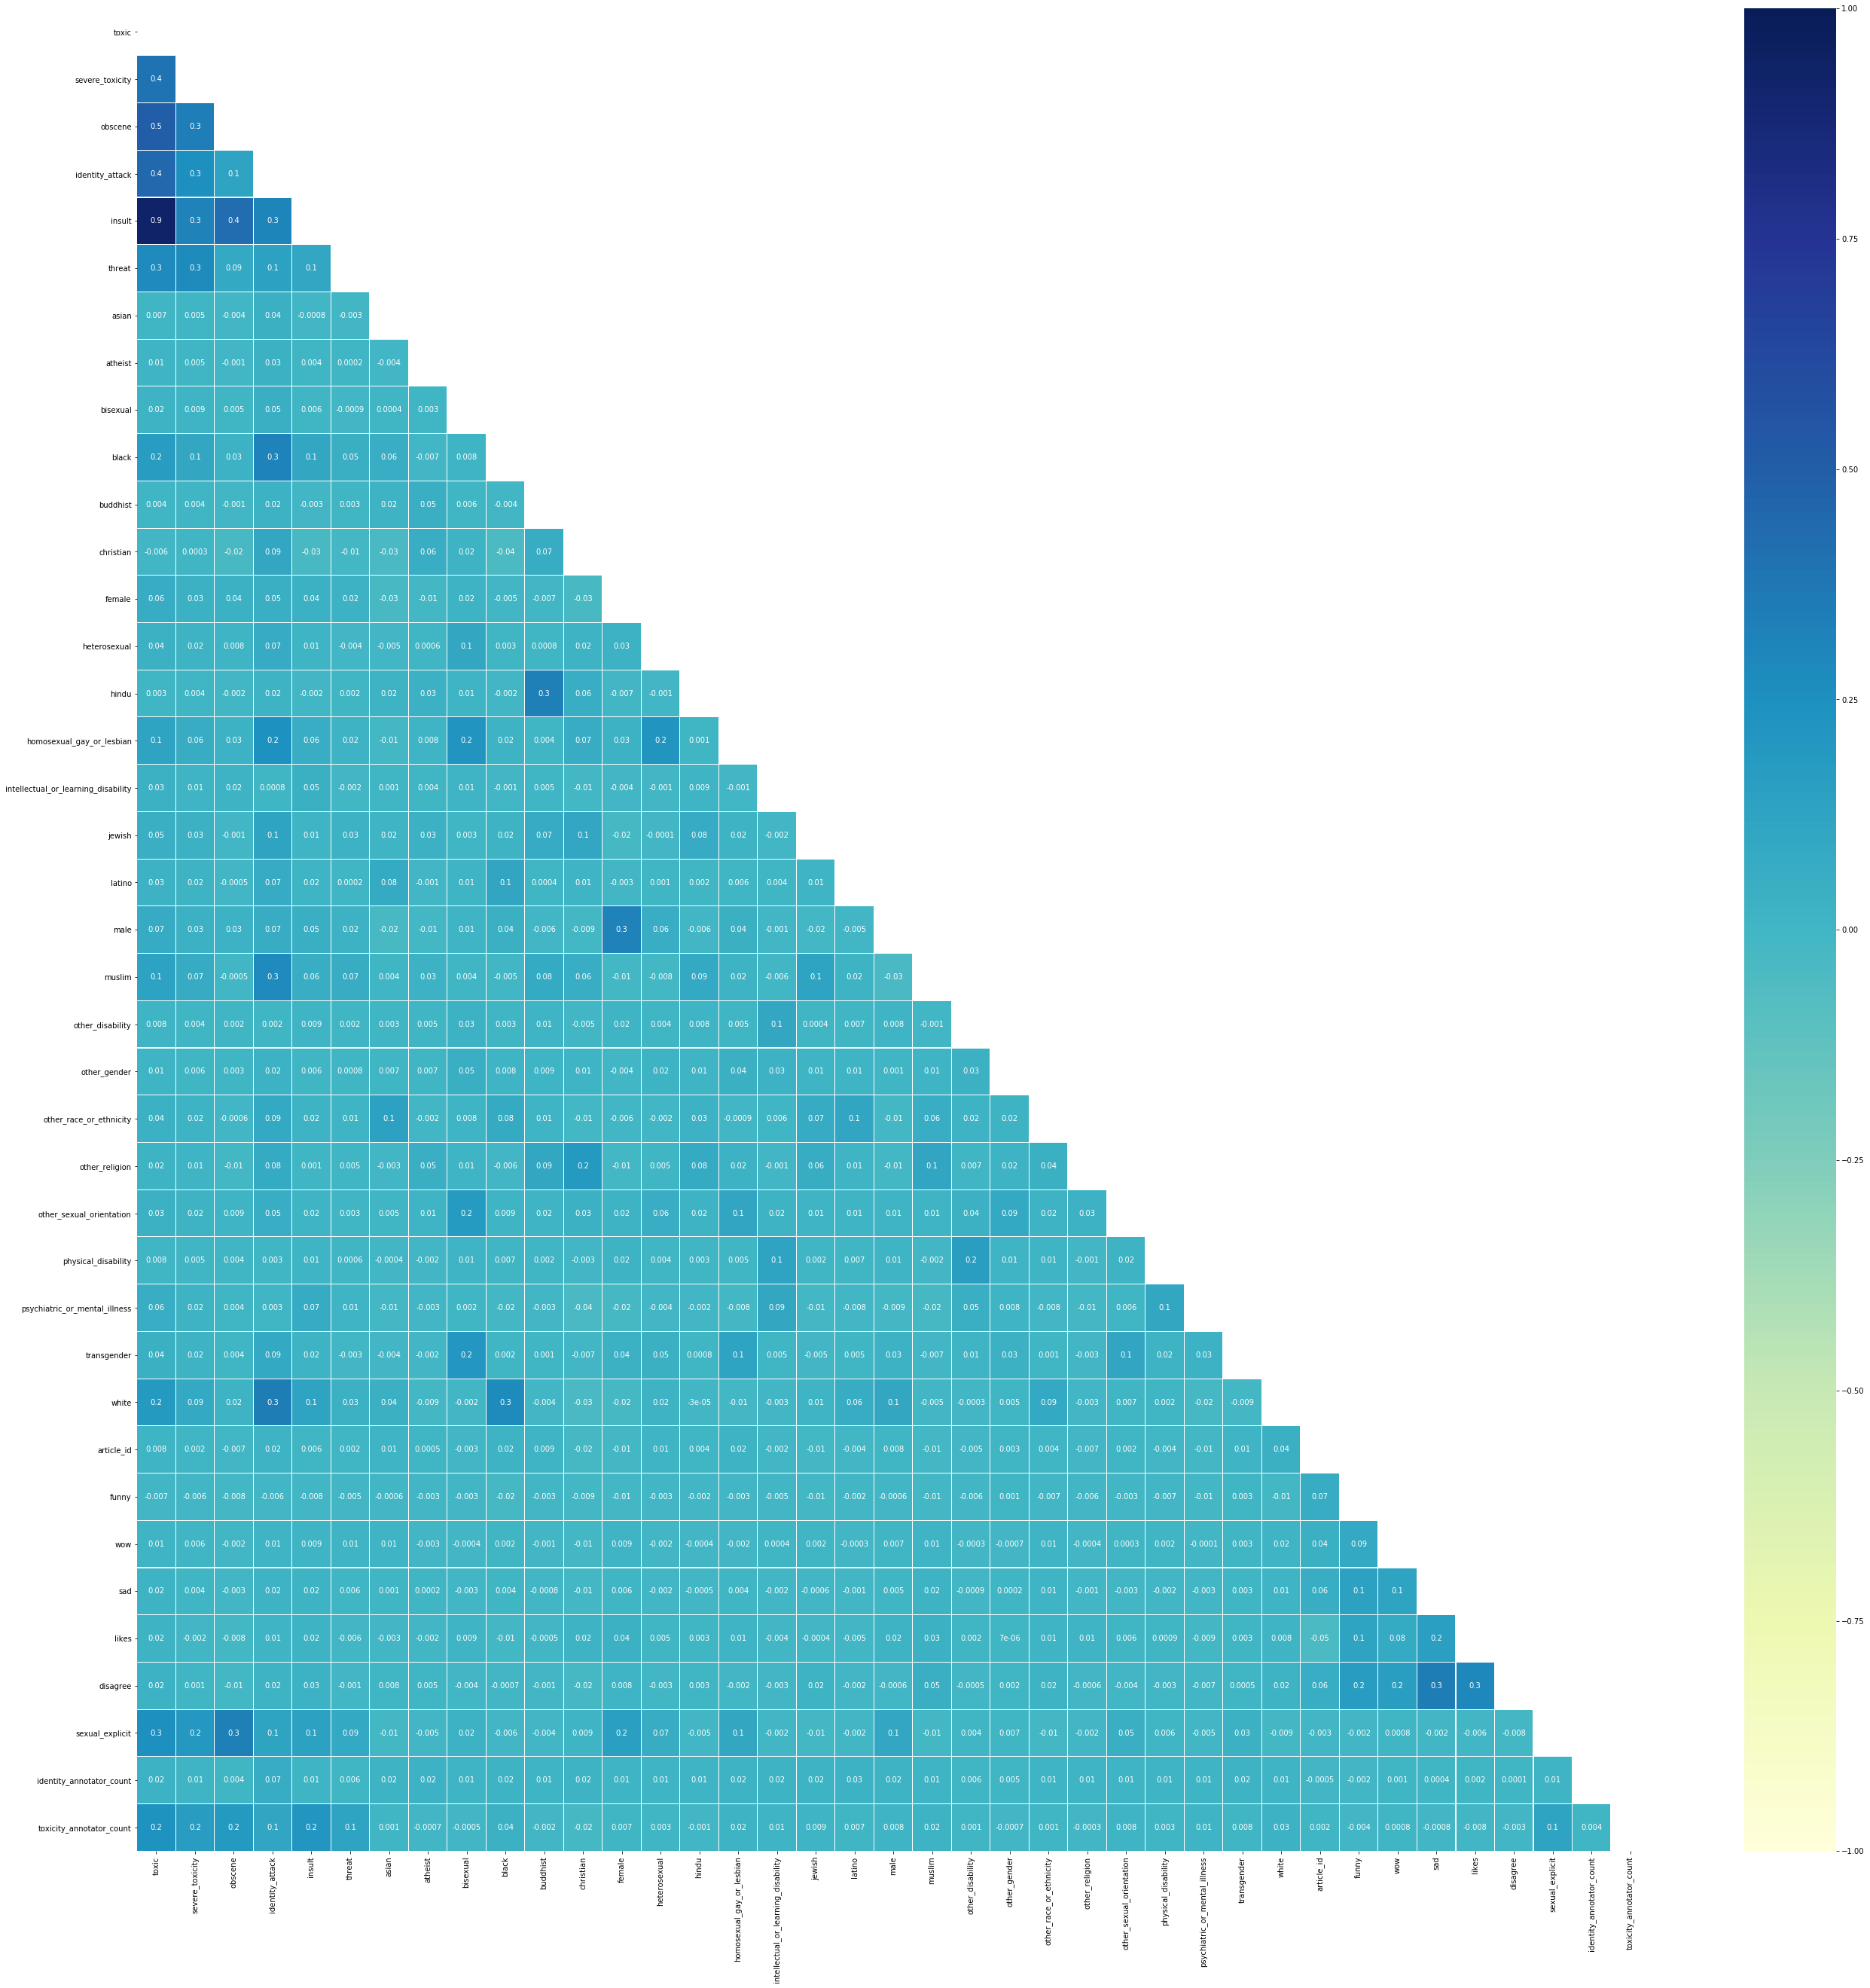

In [37]:
#create a correlation heatmap of all features
matrix = np.triu(data.corr())
plt.subplots(figsize=(45,45))
sns.heatmap(data.corr(),
           mask=matrix,
           annot = True,
           fmt = '.1g',
           vmin=-1, 
           vmax=1, 
           center= 0,
           cmap= 'YlGnBu',
           linewidth=.1
           );

In [ ]:
#boxplots


According to the headmap above toxicity correlates very high (90%) with insults. 
Sexual explicit language is seemingly used more (20%) against women. 
And identity_attacks correlate higher with (20%) with muslims. 

Disagreement correlates higher with other social media rating options like funny, wow, sad, likes.

## Toxic Comment Examples

**Extract example comments from dataset**

Let's take a look on what the comments we are working with look like and read some of them. 
Please be aware, that they might use vulgar and obscene language.


In [40]:
train_data.head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0


In [37]:
print("A toxic comment from the data:")
print(train_data[train_data.toxic==1].iloc[67,1])

A toxic comment from the data:
Wikipedia administrators are defending a mass-murdering psychopath.


In [41]:
print("A severe toxic comment from the data:")
print(train_data[train_data.severe_toxic>=0.5].iloc[4,0])

A severe toxic comment from the data:
018663f910e0bfe6


In [42]:
print("An example comment including threat:")
print(train_data[train_data.threat==1].iloc[66,1])

An example comment including threat:
yeah is that youuu

oh i think it is big boi

yeah so, whoever wrote that big shit about myles, im going to come round to your shitty little house and stuff a petrol bomb through you fucking shitty little cunt of a letterbox. and yes i do know who you and your inbred parent cunts are. i know where you live. i know your parents mobile phone numbers. i know where they work. be afraid, be very afraid.

and i will find a way to stick a fat off bottle of lit jack daniels thru your door.

so fuck off

yours sincerly

the back up of myles

ps see you at 12.30 on saturday


In [43]:
print("Obscene:")
print(train_data[train_data.obscene==1].iloc[34,1])

Obscene:
"

 You Suck 

If you don't undelete the page ""Barry Dejay"" I will %$#@ you!"


In [46]:
print("identity_hate:")
print(train_data[train_data.identity_hate==1].iloc[37,1])

identity_hate:
but ew 

He was a fαg which is against nature and is the most disgusting thing. Youre not a woman are you? Sexism is wrong. Being wrong is for women.


As you can see in these example, we are dealing with some very harsh content. There is one way or another to deal with such trolls, but if you want to support a healthy online culture you have to take this phenomenon seriously. Simply ignoring them, won't do. 

In [47]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count=data.iloc[:,1:6].sum()

In [48]:
data_count

toxic              195938.969043
severe_toxicity      8722.569474
obscene             26412.272845
identity_attack     42981.435129
insult             154405.399588
dtype: float64

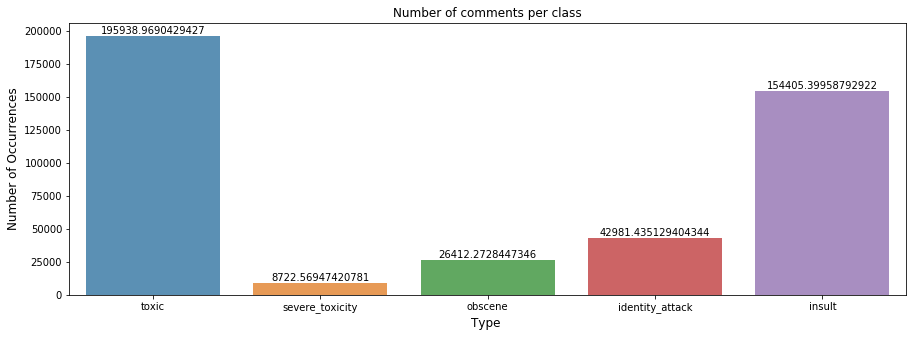

In [49]:
# Plot a chart with the following size
plt.figure(figsize=(15,5))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("Number of comments per class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [50]:
num_rows = len(data)
print(num_rows)

1902194


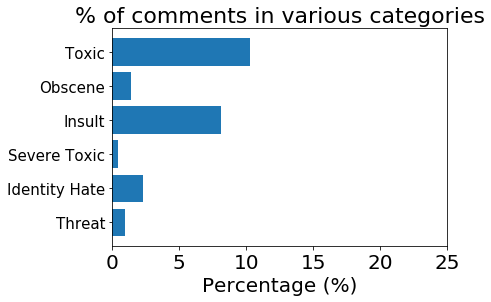

In [52]:
# Create a bar graph 
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxicity'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_attack'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

**Creading Word Clouds**

In [53]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=3000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(40,40))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

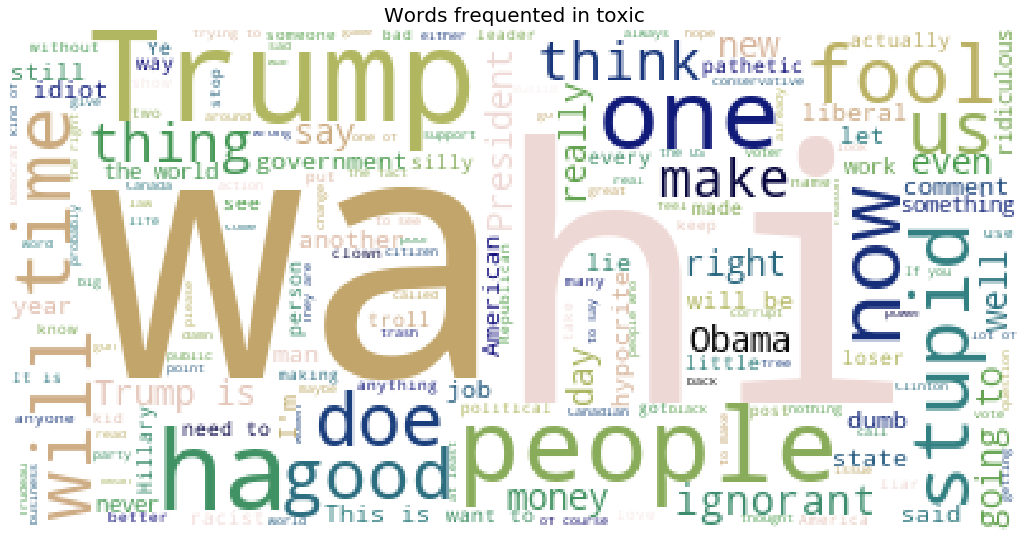

In [54]:
wordcloud(data, 'toxic')

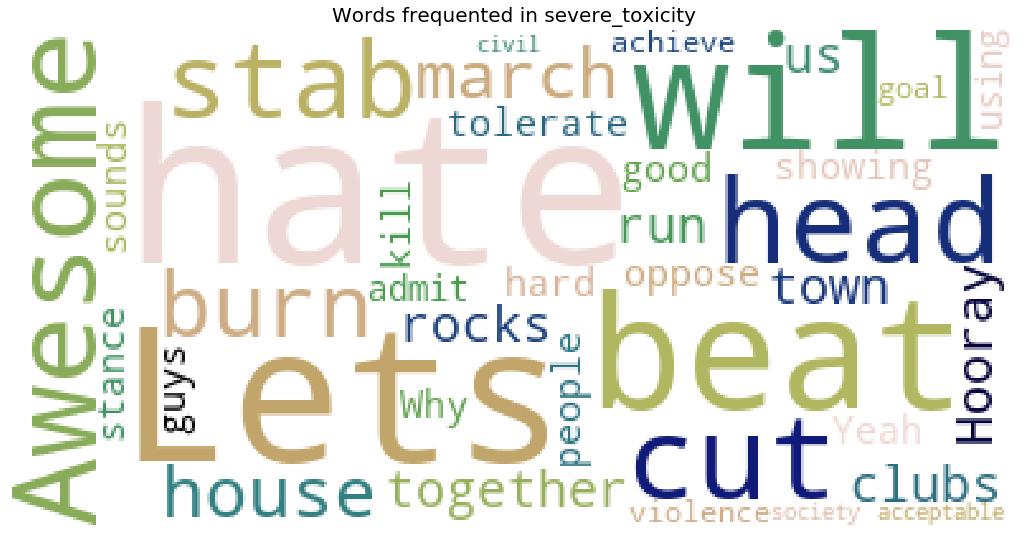

In [58]:
wordcloud(data, 'severe_toxicity')

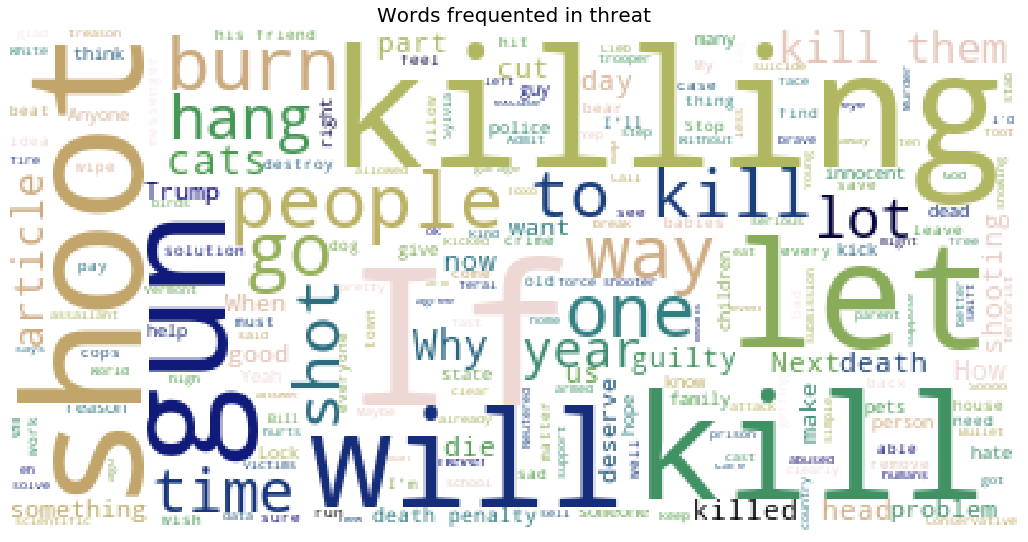

In [56]:
wordcloud(data, 'threat')

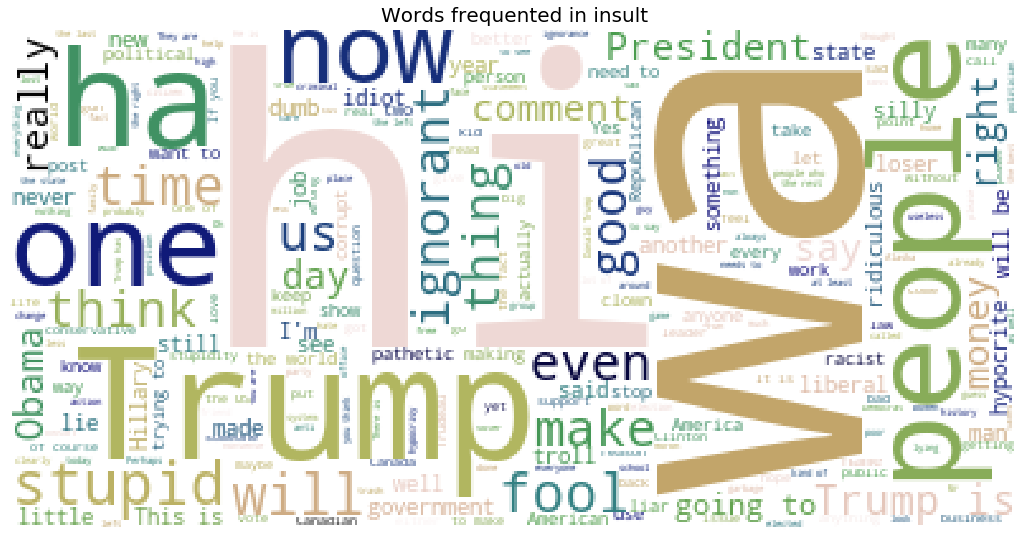

In [57]:
wordcloud(data, 'insult')

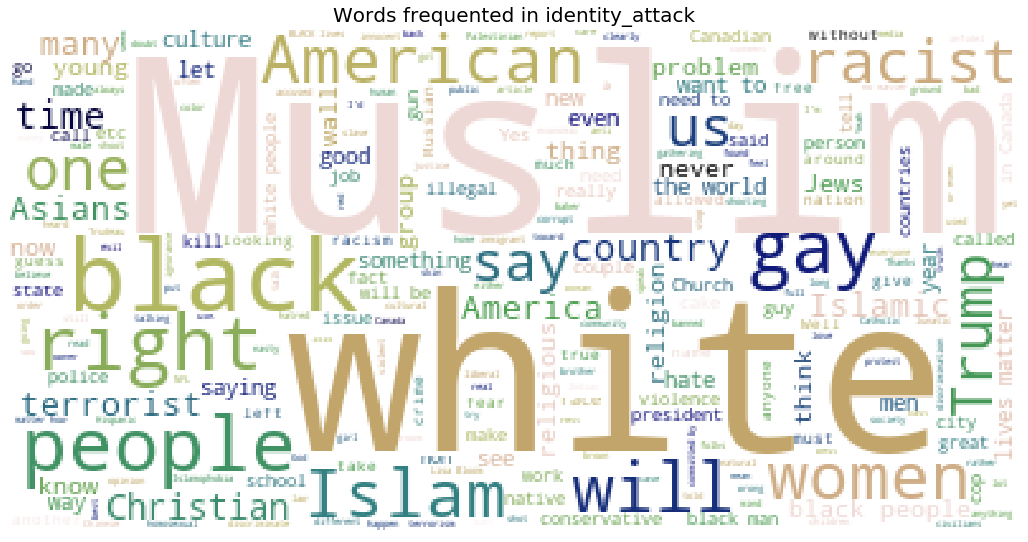

In [59]:
wordcloud(data, 'identity_attack')